## Curvature Calculation

In [99]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import interp1d
from numpy import cos, sin, pi

#### 1. Create Curve (Math Eq)

In [100]:
def create_curve():
    """
    Create a random cubic curve that starts at the origin [0,0] and extends only in one direction 
    (positive x-axis) in the x-z plane.

    Returns:
    np.poly1d: The polynomial function defining the curve.
    """
    np.random.seed(3)  # For reproducibility
    coefficients = np.random.rand(3) - 0.5  # Polynomial coefficients for a cubic curve, excluding the constant term
    f = np.poly1d(np.append(coefficients, 0))  # Adding a zero constant term ensures the curve starts at [0,0]
    return f

In [101]:
def arc_length(f_prime, start, end):
    """
    Compute the arc length of a curve segment defined by f(x) from start to end.

    Parameters:
    f_prime (np.poly1d): The first derivative of the polynomial function defining the curve.
    start (float): The starting value of x.
    end (float): The ending value of x.

    Returns:
    float: Arc length of the curve segment.
    """
    integrand = lambda x: np.sqrt(1 + f_prime(x)**2)
    length, _ = quad(integrand, start, end)
    return length

In [124]:
def sample_points_equal_arc(f, n, L):
    """
    Sample n points at equal arc lengths along the curve f(x).

    Parameters:
    f (np.poly1d): The polynomial function defining the curve.
    n (int): Number of points to sample.

    Returns:
    np.ndarray: Array of sampled points in homogeneous coordinates.
    """
    f_prime = np.polyder(f)  # First derivative of f

    total_arclength = arc_length(f_prime, 0, 10)
    print(total_arclength ,L)
    L_seg = L / n

    # place holder
    x_values = np.linspace(0, L, L*1000 +1)  # Increased number of points for more accuracy
    arc_lengths = np.zeros_like(x_values)

    # Compute the cumulative arc length at each x-value
    for i in range(1, len(x_values)):
        arc_lengths[i] = arc_lengths[i - 1] + arc_length(f_prime, x_values[i - 1], x_values[i])
        # print(f'arc length at point {i}: {arc_lengths[i]}')

    # Ensure the last value of arc_lengths is equal to total_length
    arc_lengths[-1] = L

    # Interpolate to find x-values corresponding to equal arc lengths
    equal_arc_x = interp1d(arc_lengths, x_values)(np.linspace(L_seg, L, n))

    # Compute z-values and convert to homogeneous coordinates
    z_values = f(equal_arc_x)
    homogeneous_points = np.column_stack((equal_arc_x, np.zeros_like(equal_arc_x), z_values, np.ones_like(equal_arc_x)))

    return homogeneous_points

In [126]:
def plot_curve_with_points(f, points):
    """
    Plot a curve and the sampled points on it.

    Parameters:
    f (np.poly1d): The polynomial function defining the curve.
    points (np.ndarray): Array of sampled points in homogeneous coordinates.
    """
    # Extract x and z coordinates from the homogeneous points
    x_values = points[:, 0]
    z_values = points[:, 2]

    # Generate curve points for plotting
    x_curve = np.linspace(0, 10, 1000)
    z_curve = f(x_curve)

    plt.figure(figsize=(8, 8))
    plt.plot(x_curve, z_curve, label='Curve')
    plt.scatter(x_values, z_values, color='red', label='Sampled Points')
    plt.xlabel('x')
    plt.ylabel('z')
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title('Random Cubic Polynomial Curve with Sampled Points')
    plt.grid(True)
    plt.legend()
    plt.show()

71.76192030376149 10


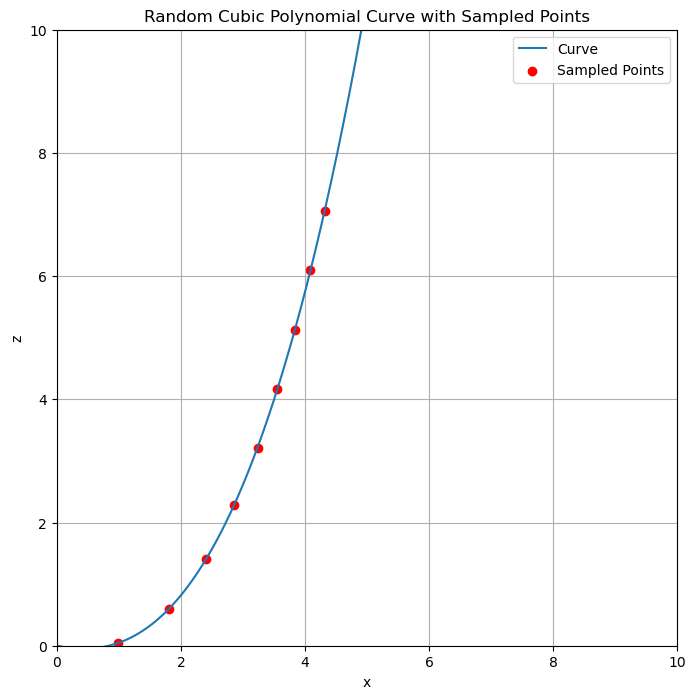

In [127]:
# Sample points at equal arc lengths along the curve
L = 10
n =10
f = create_curve()
p_d = sample_points_equal_arc(f, n, L) # desired point, homo coord
plot_curve_with_points(f, p_d)


#### 2. Calculate Segment Curvatures (Direct from Eq)

In [109]:
# find jth segment arclength (start from origin)
def find_s(L, n):
    s = []
    for j in range(2, n+2):  
        s.append((j-1) * L / n)
    return s
    
# # Example usage of the function
# L = 10  # Total length
# n = 5   # Number of segments
# s_values = find_s(L, n)
# s_values

In [105]:
R_y_90 = np.array([[np.cos(pi/2), 0, np.sin(pi/2), 0],
                    [0, 1, 0, 0],
                    [-np.sin(pi/2), 0, np.cos(pi/2), 0],
                    [0, 0, 0, 1]])

In [106]:
# unknown c, l, k
L = 10
n = 10
c = L/n * beta
l = L/n *(1-beta)
th = k * l

# curvature bending transformation
Tb = np.array([[cos(th), 0, sin(th), (1-cos(th)) / k],
                [0, 1, 0, 0],
                [-sin(th), 0, cos(th), sin(th) / k],
                [0, 0, 0, 1]])

# curvature bending translation
Tr = np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, c],
                [0, 0, 0, 1]])
p_i = [0,0,0,1] # initial point
p_1 = p_i @ Tb @ Tr
error = R_y_90.T * (p[j] - p_d[j])


IndentationError: unexpected indent (782749084.py, line 21)

In [ ]:
k = 1
l = 1
th = k * l
c = 1
L = 1
n = 1
beta = 1



# solve for segment k, l, c
point_i = [0,0,0,1]  # homogeneous

# unknown c, l, k
c = L/n * beta
l = L/n *(1-beta)
th = k * l

# curvature bending transformation
Tb = np.array([[cos(th), 0, sin(th), (1-cos(th)) / k],
                [0, 1, 0, 0],
                [-sin(th), 0, cos(th), sin(th) / k],
                [0, 0, 0, 1]])

# curvature bending translation
Tr = np.array([[1, 0, 0, 0],
                [0, 1, 0, 0],
                [0, 0, 1, c],
                [0, 0, 0, 1]])

# point first transform through Tb, then Tr
point_1 = point_i @ Tb @ Tr